In [85]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn
import os
from sklearn.model_selection import train_test_split

In [87]:
def convert_to_categorical(time_str):
    hour = int(time_str.split(':')[0])
    
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Noon'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [88]:
airline_data = pd.read_csv("./Syracuse_Weather.csv")

In [89]:
airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,...,SYR_wind_type,SYR_wind_speed,SYR_ceiling_height,SYR_ceiling_det_code,SYR_celing_CAVOK,SYR_visibility_dist,SYR_visibility_variability,SYR_air_temparature,SYR_dew_point_temparature,SYR_sea_level_pressure
0,B6,2010-01-01,JFK,00:01,76,LATE,1,1,winter,Friday,...,N,17.4,741.370199,M,N,6110.0,N,-4.8,-24.0,10154.572817
1,B6,2010-01-01,JFK,08:55,75,LATE,1,1,winter,Friday,...,C,0.0,548.800000,M,N,2414.0,N,-17.0,-28.8,10132.352069
2,MQ,2010-01-01,ORD,11:20,100,ONTIME,1,1,winter,Friday,...,C,0.0,841.400000,M,N,3138.4,N,-19.4,-29.6,10129.796558
3,9E,2010-01-01,DTW,11:44,84,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076
4,B6,2010-01-01,JFK,11:52,71,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076


In [90]:
dataframe = airline_data[['latitude', 'longitude', 'elevation',
       'wind_direction',  'wind_speed', 'ceiling_height','visibility_dist', 'air_temparature', 'dew_point_temparature',
       'sea_level_pressure']]

<Axes: >

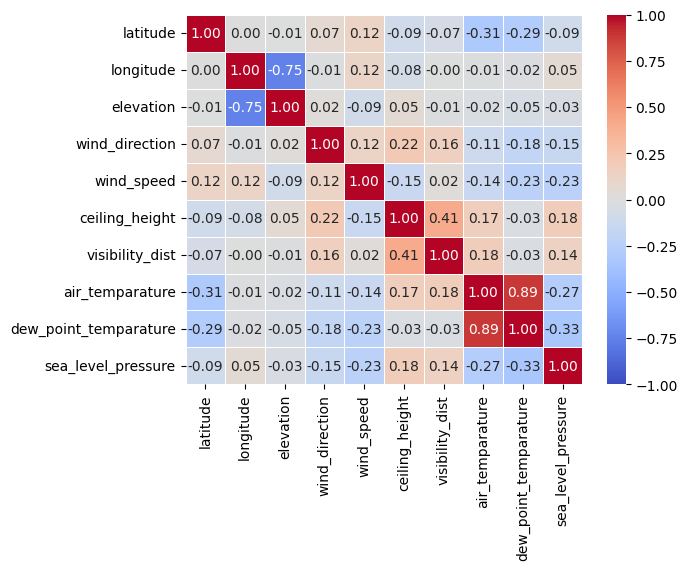

In [91]:
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

In [92]:
airline_data['SCHED_ARRV_TIME_CAT'] = airline_data['Scheduled Arrival Time'].apply(convert_to_categorical)

In [93]:
airline_data.shape

(113671, 41)

In [94]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Origin Airport',
       'Scheduled Arrival Time', 'Scheduled Elapsed Time (Minutes)',
       'FLIGHT_STATUS', 'month', 'day', 'season', 'WeekDay', 'UNIX_DATE',
       'UNIX_TIMESTAMP', 'latitude', 'longitude', 'elevation',
       'wind_direction', 'wind_type', 'wind_speed', 'ceiling_height',
       'ceiling_det_code', 'celing_CAVOK', 'visibility_dist',
       'visibility_variability', 'air_temparature', 'dew_point_temparature',
       'sea_level_pressure', 'SYR_latitude', 'SYR_longitude', 'SYR_elevation',
       'SYR_wind_direction', 'SYR_wind_type', 'SYR_wind_speed',
       'SYR_ceiling_height', 'SYR_ceiling_det_code', 'SYR_celing_CAVOK',
       'SYR_visibility_dist', 'SYR_visibility_variability',
       'SYR_air_temparature', 'SYR_dew_point_temparature',
       'SYR_sea_level_pressure', 'SCHED_ARRV_TIME_CAT'],
      dtype='object')

In [95]:
dataframe = airline_data.drop(columns=['Date (MM/DD/YYYY)', 'Scheduled Arrival Time','day', 'UNIX_DATE','UNIX_TIMESTAMP',
                        'longitude','dew_point_temparature', 'wind_type','ceiling_height', 'ceiling_det_code', 'celing_CAVOK','visibility_variability',
                        'SYR_longitude',
        'SYR_wind_type','SYR_ceiling_height', 'SYR_ceiling_det_code', 'SYR_celing_CAVOK', 'SYR_visibility_variability', 'SYR_dew_point_temparature','SYR_latitude','SYR_elevation'])

In [96]:
dataframe.isna().sum()

Carrier Code                        0
Origin Airport                      0
Scheduled Elapsed Time (Minutes)    0
FLIGHT_STATUS                       0
month                               0
season                              0
WeekDay                             0
latitude                            0
elevation                           0
wind_direction                      0
wind_speed                          0
visibility_dist                     0
air_temparature                     0
sea_level_pressure                  0
SYR_wind_direction                  0
SYR_wind_speed                      0
SYR_visibility_dist                 0
SYR_air_temparature                 0
SYR_sea_level_pressure              0
SCHED_ARRV_TIME_CAT                 0
dtype: int64

In [97]:
dataframe.shape

(113671, 20)

In [98]:
dataframe['SYR_sea_level_pressure'] = dataframe['SYR_sea_level_pressure'].fillna(dataframe['SYR_sea_level_pressure'].mean())

In [99]:
dataframe.isna().sum()

Carrier Code                        0
Origin Airport                      0
Scheduled Elapsed Time (Minutes)    0
FLIGHT_STATUS                       0
month                               0
season                              0
WeekDay                             0
latitude                            0
elevation                           0
wind_direction                      0
wind_speed                          0
visibility_dist                     0
air_temparature                     0
sea_level_pressure                  0
SYR_wind_direction                  0
SYR_wind_speed                      0
SYR_visibility_dist                 0
SYR_air_temparature                 0
SYR_sea_level_pressure              0
SCHED_ARRV_TIME_CAT                 0
dtype: int64

In [100]:
def mps_to_mph(speed_mps):
    return (speed_mps/10.0) * 2.23694

def meters_to_miles(distance_meters):
    return distance_meters * 0.000621371
def celsius_to_fahrenheit(temperature_celsius):
    return (temperature_celsius/10.0) * 9/5 + 32

def hectopascal_to_mb(v):
    return v/10.0

In [101]:
dataframe.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
0,B6,JFK,76,LATE,1,winter,Friday,40.63915,3.4,102.428571,14.4,11212.0,10.8,10187.257819,106.000000,17.4,6110.0,-4.8,10154.572817,Late Night
1,B6,JFK,75,LATE,1,winter,Friday,40.63915,3.4,110.503072,0.0,8690.6,7.6,10153.673545,103.912190,0.0,2414.0,-17.0,10132.352069,Morning
2,MQ,ORD,100,ONTIME,1,winter,Friday,41.96019,201.8,292.000000,42.0,16093.0,-134.4,10247.800000,132.389021,0.0,3138.4,-19.4,10129.796558,Late Morning
3,9E,DTW,84,LATE,1,winter,Friday,42.23130,192.3,270.000000,55.4,10621.4,-50.0,10182.489710,144.543770,0.0,3138.4,-19.8,10129.482076,Late Morning
4,B6,JFK,71,LATE,1,winter,Friday,40.63915,3.4,159.721841,0.0,7715.6,6.8,10145.941754,144.543770,0.0,3138.4,-19.8,10129.482076,Late Morning


In [102]:
dataframe['SYR_wind_speed'] = dataframe['SYR_wind_speed'].apply(mps_to_mph)
dataframe['wind_speed'] = dataframe['wind_speed'].apply(mps_to_mph)
dataframe['visibility_dist'] = dataframe['visibility_dist'].apply(meters_to_miles)
dataframe['SYR_visibility_dist'] = dataframe['SYR_visibility_dist'].apply(meters_to_miles)
dataframe['air_temparature'] = dataframe['air_temparature'].apply(celsius_to_fahrenheit)
dataframe['SYR_air_temparature'] = dataframe['SYR_air_temparature'].apply(celsius_to_fahrenheit)
dataframe['sea_level_pressure'] = dataframe['sea_level_pressure'].apply(hectopascal_to_mb)
dataframe['SYR_sea_level_pressure'] = dataframe['SYR_sea_level_pressure'].apply(hectopascal_to_mb)

In [103]:
dataframe[dataframe.season=='spring'].head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
1666,B6,JFK,80,EARLY,3,spring,Monday,40.63915,3.4,210.0,8.545111,9.976609,37.940,1003.380000,300.0,9.618842,9.976609,35.600,1006.760000,Late Night
1667,9E,DTW,87,ONTIME,3,spring,Monday,42.23130,192.3,332.0,5.816044,9.599809,35.456,1017.176569,298.0,8.052984,8.199985,33.692,1008.654677,Morning
1668,OO,ORD,106,EARLY,3,spring,Monday,41.96019,201.8,216.0,9.439887,9.999724,33.008,1021.027984,300.0,8.052984,7.891287,33.548,1008.678891,Late Morning
1669,B6,JFK,84,EARLY,3,spring,Monday,40.63915,3.4,304.0,19.103468,9.976609,36.176,1003.460000,300.0,8.052984,7.891287,33.548,1008.678891,Late Morning
1670,OH,JFK,94,LATE,3,spring,Monday,40.63915,3.4,302.0,18.835035,9.988166,36.392,1003.180000,308.0,8.724066,8.091369,33.224,1008.953368,Late Morning


In [104]:
dataframe[dataframe.season=='winter'].head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
0,B6,JFK,76,LATE,1,winter,Friday,40.63915,3.4,102.428571,3.221194,6.966812,33.944,1018.725782,106.000000,3.892276,3.796577,31.136,1015.457282,Late Night
1,B6,JFK,75,LATE,1,winter,Friday,40.63915,3.4,110.503072,0.000000,5.400087,33.368,1015.367354,103.912190,0.000000,1.499990,28.940,1013.235207,Morning
2,MQ,ORD,100,ONTIME,1,winter,Friday,41.96019,201.8,292.000000,9.395148,9.999724,7.808,1024.780000,132.389021,0.000000,1.950111,28.508,1012.979656,Late Morning
3,9E,DTW,84,LATE,1,winter,Friday,42.23130,192.3,270.000000,12.392648,6.599830,23.000,1018.248971,144.543770,0.000000,1.950111,28.436,1012.948208,Late Morning
4,B6,JFK,71,LATE,1,winter,Friday,40.63915,3.4,159.721841,0.000000,4.794250,33.224,1014.594175,144.543770,0.000000,1.950111,28.436,1012.948208,Late Morning


In [105]:
dataframe[dataframe.season=='summer'].head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
4541,B6,JFK,81,LATE,6,summer,Tuesday,40.63915,3.4,136.000000,9.618842,7.966846,69.188,1014.562222,255.145885,9.484626,9.988166,80.564,1009.532222,Late Night
4542,9E,DTW,87,EARLY,6,summer,Tuesday,42.23130,192.3,280.000000,6.039738,2.996500,65.876,1010.513002,235.112543,1.834291,3.545667,67.568,1008.031975,Late Morning
4543,XE,ORD,104,EARLY,6,summer,Tuesday,41.96019,201.8,51.945825,1.342164,6.399873,64.508,1012.613621,220.920345,2.997500,3.745624,67.568,1007.746159,Late Morning
4544,EV,IAD,76,ONTIME,6,summer,Tuesday,38.93486,88.4,202.000000,11.005745,9.988166,72.212,1011.880000,220.920345,2.997500,3.745624,67.568,1007.746159,Late Morning
4545,XE,EWR,77,EARLY,6,summer,Tuesday,40.68250,2.1,162.724554,0.671082,8.339793,70.592,1011.080000,220.920345,2.997500,3.745624,67.568,1007.746159,Late Morning


In [106]:
dataframe[dataframe.season=='autumn'].head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
7416,9E,DTW,84,EARLY,9,autumn,Wednesday,42.23130,192.3,202.000000,5.368656,8.431135,71.204,1016.020000,140.83445,3.221194,6.285416,68.144,1016.82,Late Morning
7417,YV,IAD,67,EARLY,9,autumn,Wednesday,38.93486,88.4,208.520385,0.000000,9.388294,70.196,1018.360000,140.83445,3.221194,6.285416,68.144,1016.82,Late Morning
7418,OO,ORD,106,EARLY,9,autumn,Wednesday,41.96019,201.8,212.000000,10.379402,9.799766,78.044,1012.411038,132.83445,3.489626,6.118392,67.136,1016.78,Late Morning
7419,B6,JFK,70,ONTIME,9,autumn,Wednesday,40.63915,3.4,235.049033,2.281679,9.788209,76.172,1017.560000,124.00000,4.160708,5.518396,66.524,1016.84,Late Morning
7420,MQ,ORD,95,ONTIME,9,autumn,Wednesday,41.96019,201.8,230.000000,7.158208,9.399852,76.280,1012.470496,124.00000,4.160708,5.518396,66.524,1016.84,Late Morning


<!-- # 1 Iteration -->

In [108]:
# airline_data = pd.read_csv("Iteration1.csv")

In [4]:
# airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT
0,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME
1,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,LATE
2,MQ,2010-01-01,4094,N610MQ,ORD,11:20,100,ONTIME,1,1,winter,Friday,LATE
3,9E,2010-01-01,3818,89289E,DTW,11:44,84,LATE,1,1,winter,Friday,ONTIME
4,B6,2010-01-01,42,N586JB,JFK,11:52,71,LATE,1,1,winter,Friday,LATE


In [5]:
# airline_data['SCHED_ARRV_TIME_CAT'] = airline_data['Scheduled Arrival Time'].apply(convert_to_categorical)

In [6]:
# airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT,SCHED_ARRV_TIME_CAT
0,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME,Late Night
1,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,LATE,Morning
2,MQ,2010-01-01,4094,N610MQ,ORD,11:20,100,ONTIME,1,1,winter,Friday,LATE,Late Morning
3,9E,2010-01-01,3818,89289E,DTW,11:44,84,LATE,1,1,winter,Friday,ONTIME,Late Morning
4,B6,2010-01-01,42,N586JB,JFK,11:52,71,LATE,1,1,winter,Friday,LATE,Late Morning


In [7]:
# dataframe = airline_data.drop(columns=['Date (MM/DD/YYYY)', 'Flight Number','Tail Number', 'Scheduled Arrival Time'])

In [8]:
# dataframe.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT,SCHED_ARRV_TIME_CAT
0,B6,JFK,76,LATE,1,1,winter,Friday,ONTIME,Late Night
1,B6,JFK,75,LATE,1,1,winter,Friday,LATE,Morning
2,MQ,ORD,100,ONTIME,1,1,winter,Friday,LATE,Late Morning
3,9E,DTW,84,LATE,1,1,winter,Friday,ONTIME,Late Morning
4,B6,JFK,71,LATE,1,1,winter,Friday,LATE,Late Morning


In [9]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import OneHotEncoder

# class MultiColumnOneHotEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, columns=None):
#         self.columns = columns
#         self.encoder = None

#     def fit(self, X, y=None):
#         self.encoder = OneHotEncoder(sparse_output=False, drop='first')
#         self.encoder.fit(X[self.columns])
#         return self

#     def transform(self, X):
#         X_encoded = X.copy()
#         encoded_data = self.encoder.transform(X[self.columns])
#         encoded_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(self.columns), index=X.index)
        
#         # Drop the original columns
#         X_encoded = X_encoded.drop(columns=self.columns)
        
#         # Concatenate the encoded DataFrame with the original DataFrame, preserving the index
#         X_encoded = pd.concat([X_encoded, encoded_df], axis=1)
#         return X_encoded

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

In [10]:
# dataframe.columns

Index(['Carrier Code', 'Origin Airport', 'Scheduled Elapsed Time (Minutes)',
       'FLIGHT_STATUS', 'month', 'day', 'season', 'WeekDay', 'PREV_STAT',
       'SCHED_ARRV_TIME_CAT'],
      dtype='object')

In [110]:
# dataframe.isna().sum()

NameError: name 'dataframe' is not defined

In [12]:
# Initial_encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month','PREV_STAT', 'WeekDay'])

In [13]:
# encoded_data = Initial_encoder.fit_transform(dataframe.drop(columns=['FLIGHT_STATUS']))

In [14]:
# trainX, testX, trainY, testY = train_test_split(
#     encoded_data,
#     dataframe['FLIGHT_STATUS'], 
#     test_size=0.2, 
#     random_state=947,
#     stratify=dataframe['FLIGHT_STATUS']
# )

In [15]:
# from sklearn.preprocessing import StandardScaler

In [16]:
# scaler = StandardScaler()


# enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
# enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [17]:
# enc_trainX

,Scheduled Elapsed Time (Minutes),day,Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Carrier Code_EV,Carrier Code_F9,Carrier Code_G4,Carrier Code_MQ,Carrier Code_OH,...,month_11,month_12,PREV_STAT_LATE,PREV_STAT_ONTIME,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
109767,0.420191,0.718113,-0.237358,-0.448859,-0.351464,-0.344872,-0.127516,-0.15405,2.914831,-0.226431,...,-0.30596,-0.300294,1.526678,-0.561416,-0.417338,-0.370459,-0.408178,-0.420982,-0.409240,-0.411655
21666,-1.129327,-1.678529,-0.237358,-0.448859,-0.351464,2.899624,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,1.526678,-0.561416,-0.417338,-0.370459,2.449914,-0.420982,-0.409240,-0.411655
107873,2.104451,-1.336151,-0.237358,2.227871,-0.351464,-0.344872,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,1.526678,-0.561416,-0.417338,-0.370459,-0.408178,-0.420982,-0.409240,-0.411655
20188,0.049654,-1.107900,-0.237358,-0.448859,-0.351464,-0.344872,-0.127516,-0.15405,2.914831,-0.226431,...,-0.30596,-0.300294,-0.655017,1.781212,-0.417338,-0.370459,-0.408178,-0.420982,-0.409240,-0.411655
96511,-0.624050,1.288742,-0.237358,-0.448859,-0.351464,-0.344872,-0.127516,-0.15405,-0.343073,4.416353,...,-0.30596,-0.300294,1.526678,-0.561416,-0.417338,-0.370459,-0.408178,-0.420982,2.443552,-0.411655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56030,1.969710,1.516994,-0.237358,2.227871,-0.351464,-0.344872,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,-0.655017,-0.561416,-0.417338,2.699351,-0.408178,-0.420982,-0.409240,-0.411655
22547,1.228636,0.375736,-0.237358,-0.448859,2.845245,-0.344872,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,-0.655017,-0.561416,-0.417338,-0.370459,2.449914,-0.420982,-0.409240,-0.411655
63492,0.790729,-1.336151,-0.237358,-0.448859,2.845245,-0.344872,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,-0.655017,-0.561416,-0.417338,-0.370459,-0.408178,-0.420982,-0.409240,-0.411655
51736,1.262321,1.745245,-0.237358,-0.448859,2.845245,-0.344872,-0.127516,-0.15405,-0.343073,-0.226431,...,-0.30596,-0.300294,-0.655017,-0.561416,2.396141,-0.370459,-0.408178,-0.420982,-0.409240,-0.411655


In [18]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
#     """
#     Perform classification using Regularized Logistic Regression for three-class prediction.
    
#     Parameters:
#         trainX (DataFrame or array-like): Features for training.
#         trainY (Series or array-like): Target variable for training.
#         testX (DataFrame or array-like): Features for testing.
#         testY (Series or array-like): Target variable for testing.
#         penalty (str, optional): Regularization type ('l1' for Lasso, 'l2' for Ridge). Default is 'l2'.
#         C (float, optional): Inverse of regularization strength; smaller values specify stronger regularization. Default is 1.0.
#         max_iter (int, optional): Maximum number of iterations for optimization algorithm. Default is 1000.
#         solver (str, optional): Optimization algorithm to use ('lbfgs', 'sag', 'saga', etc.). Default is 'lbfgs'.
        
#     Returns:
#         dict: Dictionary containing accuracy score and classification report.
#     """
#     # Get unique target names
#     target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
#     # Initialize and train the Logistic Regression model
#     model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
#     model.fit(trainX, trainY)
    
#     # Predict on the testing set
#     testY_pred = model.predict(testX)
    
#     # Calculate accuracy score
#     accuracy = accuracy_score(testY, testY_pred)
    
#     # Generate classification report
#     report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
#     results = {
#         'accuracy': accuracy,
#         'classification_report': report
#     }
    
#     return results


In [19]:
# report = logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, max_iter=1500, solver='saga')
# print(report)

convergence after 185 epochs took 62 seconds
{'accuracy': 0.49404002639102707, 'classification_report': {'EARLY': {'precision': 0.5183614975816564, 'recall': 0.8308767228177641, 'f1-score': 0.6384261812833242, 'support': 10448.0}, 'LATE': {'precision': 0.43069914140529175, 'recall': 0.3603048959249487, 'f1-score': 0.39236970229068563, 'support': 6822.0}, 'ONTIME': {'precision': 0.3309608540925267, 'recall': 0.017017383348581886, 'f1-score': 0.03237034458753916, 'support': 5465.0}, 'accuracy': 0.49404002639102707, 'macro avg': {'precision': 0.42667383102649165, 'recall': 0.4027330006970982, 'f1-score': 0.35438874272051635, 'support': 22735.0}, 'weighted avg': {'precision': 0.44700996424084916, 'recall': 0.49404002639102707, 'f1-score': 0.4189103489881737, 'support': 22735.0}}}


In [20]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):
#     """
#     Perform classification using Decision Trees for three-class prediction.
    
#     Parameters:
#         trainX (DataFrame or array-like): Features for training.
#         trainY (Series or array-like): Target variable for training.
#         testX (DataFrame or array-like): Features for testing.
#         testY (Series or array-like): Target variable for testing.
#         criterion (str, optional): Criterion used to measure the quality of a split ('gini' or 'entropy'). Default is 'gini'.
#         max_depth (int, optional): Maximum depth of the tree. If None, the tree is fully grown. Default is None.
        
#     Returns:
#         dict: Dictionary containing accuracy score and classification report.
#     """
#     # Get unique target names
#     target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
#     # Initialize and train the Decision Tree model
#     model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
#     model.fit(trainX, trainY)
    
#     # Predict on the testing set
#     testY_pred = model.predict(testX)
    
#     # Calculate accuracy score
#     accuracy = accuracy_score(testY, testY_pred)
    
#     # Generate classification report
#     report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
#     results = {
#         'accuracy': accuracy,
#         'classification_report': report
#     }
    
#     return results

In [21]:
# decision_tree_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.40958873982845834,
 'classification_report': {'EARLY': {'precision': 0.5223851225031979,
   'recall': 0.508135528330781,
   'f1-score': 0.515161806802193,
   'support': 10448.0},
  'LATE': {'precision': 0.36193975018368846,
   'recall': 0.36103781882145997,
   'f1-score': 0.36148822191237984,
   'support': 6822.0},
  'ONTIME': {'precision': 0.26703658748049247,
   'recall': 0.2817932296431839,
   'f1-score': 0.2742165242165242,
   'support': 5465.0},
  'accuracy': 0.40958873982845834,
  'macro avg': {'precision': 0.38378715338912633,
   'recall': 0.3836555255984749,
   'f1-score': 0.3836221843103657,
   'support': 22735.0},
  'weighted avg': {'precision': 0.41286068556179567,
   'recall': 0.40958873982845834,
   'f1-score': 0.41113158179893877,
   'support': 22735.0}}}

In [22]:
# from sklearn.metrics import accuracy_score, classification_report

# from sklearn.preprocessing import LabelEncoder

# def fit_and_evaluate(model, trainX, trainY, testX, testY):
#     # Convert string labels to integers
#     label_encoder = LabelEncoder()
#     trainY_encoded = label_encoder.fit_transform(trainY)
#     testY_encoded = label_encoder.transform(testY)
    
#     model.fit(trainX, trainY_encoded)
#     testY_pred = model.predict(testX)
#     accuracy = accuracy_score(testY_encoded, testY_pred)
#     report = classification_report(testY_encoded, testY_pred, output_dict=True)
#     results = {'accuracy': accuracy, 'classification_report': report}
#     return results

# # Update other classification functions similarly...


# # Random Forest
# from sklearn.ensemble import RandomForestClassifier

# def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
#     model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # Support Vector Machines (SVM)
# from sklearn.svm import SVC

# def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
#     model = SVC(kernel=kernel, C=C)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # K-Nearest Neighbors (KNN)
# from sklearn.neighbors import KNeighborsClassifier

# def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
#     model = KNeighborsClassifier(n_neighbors=n_neighbors)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # Gradient Boosting Machines (GBM)
# from sklearn.ensemble import GradientBoostingClassifier

# def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
#     model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB

# def naive_bayes_classification(trainX, trainY, testX, testY):
#     model = GaussianNB()
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # AdaBoost
# from sklearn.ensemble import AdaBoostClassifier

# def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
#     model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)

# # XGBoost
# from xgboost import XGBClassifier

# def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
#     model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
#     return fit_and_evaluate(model, trainX, trainY, testX, testY)


In [23]:
# random_forest_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.45660875302397186,
 'classification_report': {'0': {'precision': 0.5377150071011519,
   'recall': 0.6522779479326187,
   'f1-score': 0.5894818787302136,
   'support': 10448.0},
  '1': {'precision': 0.39628180039138944,
   'recall': 0.3562005277044855,
   'f1-score': 0.37517369152385366,
   'support': 6822.0},
  '2': {'precision': 0.2891320946805803,
   'recall': 0.207868252516011,
   'f1-score': 0.24185650415158613,
   'support': 5465.0},
  'accuracy': 0.45660875302397186,
  'macro avg': {'precision': 0.40770963405770716,
   'recall': 0.40544890938437167,
   'f1-score': 0.40217069146855117,
   'support': 22735.0},
  'weighted avg': {'precision': 0.4355217828850788,
   'recall': 0.45660875302397186,
   'f1-score': 0.4416136964036692,
   'support': 22735.0}}}

In [24]:
# knn_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.44913129535957774,
 'classification_report': {'0': {'precision': 0.5044040737682356,
   'recall': 0.7015696784073507,
   'f1-score': 0.5868694955964772,
   'support': 10448.0},
  '1': {'precision': 0.3836832223928998,
   'recall': 0.32952213427147464,
   'f1-score': 0.35454617143758377,
   'support': 6822.0},
  '2': {'precision': 0.27005119453924914,
   'recall': 0.11582799634034767,
   'f1-score': 0.16212063004225893,
   'support': 5465.0},
  'accuracy': 0.44913129535957774,
  'macro avg': {'precision': 0.3860461635667949,
   'recall': 0.382306603006391,
   'f1-score': 0.36784543235877326,
   'support': 22735.0},
  'weighted avg': {'precision': 0.4118465134836985,
   'recall': 0.44913129535957774,
   'f1-score': 0.41505677214515657,
   'support': 22735.0}}}

In [25]:
# gbm_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.49566747305915987,
 'classification_report': {'0': {'precision': 0.5042281006071119,
   'recall': 0.8903139356814701,
   'f1-score': 0.6438261351052049,
   'support': 10448.0},
  '1': {'precision': 0.46487804878048783,
   'recall': 0.2793902081501026,
   'f1-score': 0.34902032594762866,
   'support': 6822.0},
  '2': {'precision': 0.32620320855614976,
   'recall': 0.011161939615736504,
   'f1-score': 0.021585279547062988,
   'support': 5465.0},
  'accuracy': 0.49566747305915987,
  'macro avg': {'precision': 0.43176978598124977,
   'recall': 0.39362202781576977,
   'f1-score': 0.33814391353329887,
   'support': 22735.0},
  'weighted avg': {'precision': 0.44962717302322197,
   'recall': 0.49566747305915987,
   'f1-score': 0.4057917605418343,
   'support': 22735.0}}}

In [26]:
# naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.3308115240818122,
 'classification_report': {'0': {'precision': 0.5743099787685775,
   'recall': 0.10356049004594181,
   'f1-score': 0.17547843010055142,
   'support': 10448.0},
  '1': {'precision': 0.308841963166522,
   'recall': 0.9390208150102609,
   'f1-score': 0.4648091713829633,
   'support': 6822.0},
  '2': {'precision': 0.30275229357798167,
   'recall': 0.006038426349496798,
   'f1-score': 0.011840688912809472,
   'support': 5465.0},
  'accuracy': 0.3308115240818122,
  'macro avg': {'precision': 0.3953014118376937,
   'recall': 0.34953991046856653,
   'f1-score': 0.2173760967987747,
   'support': 22735.0},
  'weighted avg': {'precision': 0.42937549220584037,
   'recall': 0.3308115240818122,
   'f1-score': 0.22296178446332265,
   'support': 22735.0}}}

In [27]:
# adaboost_classification(enc_trainX, trainY, enc_testX, testY)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': 0.49056520782933805,
 'classification_report': {'0': {'precision': 0.5067747604739498,
   'recall': 0.8555704441041347,
   'f1-score': 0.6365222344857051,
   'support': 10448.0},
  '1': {'precision': 0.43637093536732235,
   'recall': 0.31867487540310757,
   'f1-score': 0.36834971196204674,
   'support': 6822.0},
  '2': {'precision': 0.3508771929824561,
   'recall': 0.007319304666056725,
   'f1-score': 0.01433948736332676,
   'support': 5465.0},
  'accuracy': 0.49056520782933805,
  'macro avg': {'precision': 0.43134096294124274,
   'recall': 0.39385487472443304,
   'f1-score': 0.3397371446036928,
   'support': 22735.0},
  'weighted avg': {'precision': 0.44817458008167244,
   'recall': 0.49056520782933805,
   'f1-score': 0.40649357111732176,
   'support': 22735.0}}}

In [28]:
# xgboost_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.4930283703540796,
 'classification_report': {'0': {'precision': 0.4992343032159265,
   'recall': 0.9048621745788668,
   'f1-score': 0.6434575463671941,
   'support': 10448.0},
  '1': {'precision': 0.4681493684788578,
   'recall': 0.24992670771034886,
   'f1-score': 0.32587920489296635,
   'support': 6822.0},
  '2': {'precision': 0.32051282051282054,
   'recall': 0.009149130832570906,
   'f1-score': 0.01779042874933286,
   'support': 5465.0},
  'accuracy': 0.4930283703540796,
  'macro avg': {'precision': 0.4292988307358683,
   'recall': 0.3879793377072622,
   'f1-score': 0.3290423933364978,
   'support': 22735.0},
  'weighted avg': {'precision': 0.4469460108143978,
   'recall': 0.4930283703540796,
   'f1-score': 0.3977663106813004,
   'support': 22735.0}}}

In [29]:
# model = DecisionTreeClassifier(criterion='entropy', max_features='log2')
# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# print(res)

{'accuracy': 0.4043985045084671, 'classification_report': {'0': {'precision': 0.5154609101516919, 'recall': 0.5073698315467075, 'f1-score': 0.511383368705383, 'support': 10448.0}, '1': {'precision': 0.35382156349898286, 'recall': 0.3569334506009968, 'f1-score': 0.35537069468768245, 'support': 6822.0}, '2': {'precision': 0.26180642844316754, 'recall': 0.2667886550777676, 'f1-score': 0.2642740619902121, 'support': 5465.0}, 'accuracy': 0.4043985045084671, 'macro avg': {'precision': 0.3770296340312808, 'recall': 0.377030645741824, 'f1-score': 0.3770093751277592, 'support': 22735.0}, 'weighted avg': {'precision': 0.40598541574210906, 'recall': 0.4043985045084671, 'f1-score': 0.4051695651713095, 'support': 22735.0}}}


In [30]:
# model = RandomForestClassifier(n_estimators=100, criterion='entropy')
# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# print(res)

{'accuracy': 0.4559489773477018, 'classification_report': {'0': {'precision': 0.5367826018685719, 'recall': 0.6543836140888208, 'f1-score': 0.5897778736251887, 'support': 10448.0}, '1': {'precision': 0.3951756516108143, 'recall': 0.3578129580768103, 'f1-score': 0.3755673513347181, 'support': 6822.0}, '2': {'precision': 0.28474221408008377, 'recall': 0.1990850869167429, 'f1-score': 0.23433125134611243, 'support': 5465.0}, 'accuracy': 0.4559489773477018, 'macro avg': {'precision': 0.4055668225198233, 'recall': 0.403760553027458, 'f1-score': 0.39989215876867307, 'support': 22735.0}, 'weighted avg': {'precision': 0.4337061411726181, 'recall': 0.4559489773477018, 'f1-score': 0.44005893921477557, 'support': 22735.0}}}


In [31]:
model = XGBClassifier(
    colsample_bytree=0.7,enable_categorical=True,
    gamma=0.0, learning_rate=0.01, max_depth=17, 
    min_child_weight=5,n_estimators=100,
    n_jobs=20,objective='multi:softprob')
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.5124257752364196, 'classification_report': {'0': {'precision': 0.5282652219997644, 'recall': 0.8586332312404288, 'f1-score': 0.6541013488880787, 'support': 10448.0}, '1': {'precision': 0.47638603696098564, 'recall': 0.34007622398123716, 'f1-score': 0.39685254875128295, 'support': 6822.0}, '2': {'precision': 0.40656851642129105, 'recall': 0.0656907593778591, 'f1-score': 0.1131064902331443, 'support': 5465.0}, 'accuracy': 0.5124257752364196, 'macro avg': {'precision': 0.47040659179401373, 'recall': 0.42146673819984165, 'f1-score': 0.38802012929083535, 'support': 22735.0}, 'weighted avg': {'precision': 0.4834447999051567, 'recall': 0.5124257752364196, 'f1-score': 0.44686632724381053, 'support': 22735.0}}}


In [32]:
model = KNeighborsClassifier(n_neighbors=70)
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.4888497910710358, 'classification_report': {'0': {'precision': 0.508859874096526, 'recall': 0.8355666156202144, 'f1-score': 0.632517026517896, 'support': 10448.0}, '1': {'precision': 0.441290586073106, 'recall': 0.31676927587217824, 'f1-score': 0.36880279887362405, 'support': 6822.0}, '2': {'precision': 0.32697947214076245, 'recall': 0.04080512351326624, 'f1-score': 0.07255571823653816, 'support': 5465.0}, 'accuracy': 0.4888497910710358, 'macro avg': {'precision': 0.4257099774367981, 'recall': 0.397713671668553, 'f1-score': 0.35795851454268607, 'support': 22735.0}, 'weighted avg': {'precision': 0.4448645330107983, 'recall': 0.4888497910710358, 'f1-score': 0.41878282767264224, 'support': 22735.0}}}


In [33]:
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=947)
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': 0.4947437871123818, 'classification_report': {'0': {'precision': 0.5113799231783523, 'recall': 0.8537519142419602, 'f1-score': 0.6396328564769997, 'support': 10448.0}, '1': {'precision': 0.44191476941039115, 'recall': 0.33289357959542654, 'f1-score': 0.3797341359418109, 'support': 6822.0}, '2': {'precision': 0.37254901960784315, 'recall': 0.010430009149130833, 'f1-score': 0.02029191883232467, 'support': 5465.0}, 'accuracy': 0.4947437871123818, 'macro avg': {'precision': 0.4419479040655289, 'recall': 0.3990251676621725, 'f1-score': 0.34655297041704514, 'support': 22735.0}, 'weighted avg': {'precision': 0.45716386129060815, 'recall': 0.4947437871123818, 'f1-score': 0.41276998884035104, 'support': 22735.0}}}


In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def fit_and_evaluate_voting(voting_classifier, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    # Fit the VotingClassifier
    voting_classifier.fit(trainX, trainY_encoded)
    
    # Make predictions
    testY_pred = voting_classifier.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY_encoded, testY_pred)
    
    # Generate classification report
    report = classification_report(testY_encoded, testY_pred, target_names=label_encoder.classes_, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report,
        'voting_classifier': voting_classifier
    }
    
    return results

In [35]:
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [36]:
from sklearn.ensemble import VotingClassifier

# Define multiple classifiers
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=947)
knn = KNeighborsClassifier(n_neighbors=70)
xgb = XGBClassifier(
    colsample_bytree=0.7,enable_categorical=True,
    gamma=0.0, learning_rate=0.01, max_depth=17, 
    min_child_weight=5,n_estimators=100,objective='multi:softprob')

votingCLF = VotingClassifier(estimators=[('knn', knn), ('ada', ada), ('xgb', xgb)], voting='soft', weights=[5,7,10])
fit_and_evaluate_voting(votingCLF, enc_trainX, trainY, enc_testX, testY)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': 0.5060039586540577,
 'classification_report': {'EARLY': {'precision': 0.5197655711330729,
   'recall': 0.8658116385911179,
   'f1-score': 0.649576332040787,
   'support': 10448.0},
  'LATE': {'precision': 0.4709071949947862,
   'recall': 0.3309879800644972,
   'f1-score': 0.3887406387191185,
   'support': 6822.0},
  'ONTIME': {'precision': 0.373134328358209,
   'recall': 0.036596523330283626,
   'f1-score': 0.06665555740709882,
   'support': 5465.0},
  'accuracy': 0.5060039586540577,
  'macro avg': {'precision': 0.4546023648286894,
   'recall': 0.4111320473286329,
   'f1-score': 0.36832417605566814,
   'support': 22735.0},
  'weighted avg': {'precision': 0.469857870065115,
   'recall': 0.5060039586540577,
   'f1-score': 0.43118692657724933,
   'support': 22735.0}},
 'voting_classifier': VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=70)),
                              ('ada',
                               AdaBoostClassifier(learning_rate=0.8,
      

# 2 Iteration

In [109]:
airline_data = pd.read_csv("Iteration2.csv", parse_dates=["Date (MM/DD/YYYY)"])

In [38]:
airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT
0,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME
1,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME
2,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME
3,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,LATE
4,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,ONTIME


In [39]:
airline_data['SCHED_ARRV_TIME_CAT'] = airline_data['Scheduled Arrival Time'].apply(convert_to_categorical)

In [40]:
airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT,SCHED_ARRV_TIME_CAT
0,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME,Late Night
1,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME,Late Night
2,B6,2010-01-01,22,N608JB,JFK,00:01,76,LATE,1,1,winter,Friday,ONTIME,Late Night
3,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,LATE,Morning
4,B6,2010-01-01,44,N586JB,JFK,08:55,75,LATE,1,1,winter,Friday,ONTIME,Morning


In [41]:
airline_data['WeekDay'] = airline_data['Date (MM/DD/YYYY)'].dt.day_name()

In [42]:
dataframe = airline_data.drop(columns=['Date (MM/DD/YYYY)', 'Flight Number','Tail Number', 'Scheduled Arrival Time'])

In [43]:
dataframe.head()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,PREV_STAT,SCHED_ARRV_TIME_CAT
0,B6,JFK,76,LATE,1,1,winter,Friday,ONTIME,Late Night
1,B6,JFK,76,LATE,1,1,winter,Friday,ONTIME,Late Night
2,B6,JFK,76,LATE,1,1,winter,Friday,ONTIME,Late Night
3,B6,JFK,75,LATE,1,1,winter,Friday,LATE,Morning
4,B6,JFK,75,LATE,1,1,winter,Friday,ONTIME,Morning


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class MultiColumnOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = None

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_encoded = X.copy()
        encoded_data = self.encoder.transform(X[self.columns])
        encoded_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(self.columns), index=X.index)
        
        # Drop the original columns
        X_encoded = X_encoded.drop(columns=self.columns)
        
        # Concatenate the encoded DataFrame with the original DataFrame, preserving the index
        X_encoded = pd.concat([X_encoded, encoded_df], axis=1)
        return X_encoded

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [45]:
dataframe.columns

Index(['Carrier Code', 'Origin Airport', 'Scheduled Elapsed Time (Minutes)',
       'FLIGHT_STATUS', 'month', 'day', 'season', 'WeekDay', 'PREV_STAT',
       'SCHED_ARRV_TIME_CAT'],
      dtype='object')

In [46]:
dataframe['FLIGHT_STATUS'].value_counts()

FLIGHT_STATUS
EARLY     156720
LATE      102318
ONTIME     81975
Name: count, dtype: int64

In [47]:
final_encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month','PREV_STAT', "WeekDay"])

In [48]:
encoded_data = final_encoder.fit_transform(dataframe.drop(columns=['FLIGHT_STATUS', 'day']))

In [49]:
trainX, testX, trainY, testY = train_test_split(
    encoded_data,
    dataframe['FLIGHT_STATUS'], 
    test_size=0.2, 
    random_state=947,
    stratify=dataframe['FLIGHT_STATUS'],
    shuffle=True
)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()


enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [52]:
enc_trainX

,Scheduled Elapsed Time (Minutes),Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Carrier Code_EV,Carrier Code_F9,Carrier Code_G4,Carrier Code_MQ,Carrier Code_OH,Carrier Code_OO,...,month_11,month_12,PREV_STAT_LATE,PREV_STAT_ONTIME,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
19431,-0.015570,-0.239316,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,4.417417,-0.279426,...,-0.306281,-0.300953,1.526073,-0.562751,2.404319,-0.371877,-0.408237,-0.420123,-0.409397,-0.413508
157007,-0.755951,-0.239316,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,3.578767,...,-0.306281,3.322781,-0.655277,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,-0.413508
93387,-0.082877,-0.239316,-0.451807,-0.350329,2.899021,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,-0.420123,2.442615,-0.413508
325089,-1.058834,-0.239316,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,2.380254,-0.409397,-0.413508
26716,-1.058834,-0.239316,2.213335,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159518,1.969998,-0.239316,2.213335,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,2.449558,-0.420123,-0.409397,-0.413508
122068,-0.183838,-0.239316,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,2.913087,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,2.449558,-0.420123,-0.409397,-0.413508
194247,-1.126142,-0.239316,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,1.526073,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
99846,-0.890566,-0.239316,-0.451807,-0.350329,2.899021,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,3.264972,-0.300953,1.526073,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,-0.413508


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
    """
    Perform classification using Regularized Logistic Regression for three-class prediction.
    
    Parameters:
        trainX (DataFrame or array-like): Features for training.
        trainY (Series or array-like): Target variable for training.
        testX (DataFrame or array-like): Features for testing.
        testY (Series or array-like): Target variable for testing.
        penalty (str, optional): Regularization type ('l1' for Lasso, 'l2' for Ridge). Default is 'l2'.
        C (float, optional): Inverse of regularization strength; smaller values specify stronger regularization. Default is 1.0.
        max_iter (int, optional): Maximum number of iterations for optimization algorithm. Default is 1000.
        solver (str, optional): Optimization algorithm to use ('lbfgs', 'sag', 'saga', etc.). Default is 'lbfgs'.
        
    Returns:
        dict: Dictionary containing accuracy score and classification report.
    """
    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results


In [54]:
report = logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, max_iter=1500, solver='saga')
print(report)

convergence after 67 epochs took 55 seconds
{'accuracy': 0.49374660938668385, 'classification_report': {'LATE': {'precision': 0.5174918411207514, 'recall': 0.8296643695763144, 'f1-score': 0.6374086965047306, 'support': 31344.0}, 'ONTIME': {'precision': 0.431535025858016, 'recall': 0.35882525410476934, 'f1-score': 0.39183564567769474, 'support': 20464.0}, 'EARLY': {'precision': 0.3497326203208556, 'recall': 0.019945105215004574, 'f1-score': 0.03773802654356607, 'support': 16395.0}, 'accuracy': 0.49374660938668385, 'macro avg': {'precision': 0.4329198290998743, 'recall': 0.40281157629869613, 'f1-score': 0.3556607895753305, 'support': 68203.0}, 'weighted avg': {'precision': 0.45137403556159844, 'recall': 0.49374660938668385, 'f1-score': 0.4195735932667828, 'support': 68203.0}}}


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):
    """
    Perform classification using Decision Trees for three-class prediction.
    
    Parameters:
        trainX (DataFrame or array-like): Features for training.
        trainY (Series or array-like): Target variable for training.
        testX (DataFrame or array-like): Features for testing.
        testY (Series or array-like): Target variable for testing.
        criterion (str, optional): Criterion used to measure the quality of a split ('gini' or 'entropy'). Default is 'gini'.
        max_depth (int, optional): Maximum depth of the tree. If None, the tree is fully grown. Default is None.
        
    Returns:
        dict: Dictionary containing accuracy score and classification report.
    """
    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

In [56]:
decision_tree_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.5649751477207747,
 'classification_report': {'LATE': {'precision': 0.6160704694381781,
   'recall': 0.7318785094435937,
   'f1-score': 0.6689997083697871,
   'support': 31344.0},
  'ONTIME': {'precision': 0.5274196956889264,
   'recall': 0.4878322908522283,
   'f1-score': 0.5068541835905768,
   'support': 20464.0},
  'EARLY': {'precision': 0.4659855469723399,
   'recall': 0.3421774931381519,
   'f1-score': 0.3945980164591686,
   'support': 16395.0},
  'accuracy': 0.5649751477207747,
  'macro avg': {'precision': 0.5364919040331482,
   'recall': 0.5206294311446579,
   'f1-score': 0.5234839694731774,
   'support': 68203.0},
  'weighted avg': {'precision': 0.5533929957517991,
   'recall': 0.5649751477207747,
   'f1-score': 0.5543865424099854,
   'support': 68203.0}}}

In [57]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder

def fit_and_evaluate(model, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    model.fit(trainX, trainY_encoded)
    testY_pred = model.predict(testX)
    accuracy = accuracy_score(testY_encoded, testY_pred)
    report = classification_report(testY_encoded, testY_pred, output_dict=True)
    results = {'accuracy': accuracy, 'classification_report': report}
    return results

# Update other classification functions similarly...


# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Support Vector Machines (SVM)
from sklearn.svm import SVC

def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
    model = SVC(kernel=kernel, C=C)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classification(trainX, trainY, testX, testY):
    model = GaussianNB()
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# XGBoost
from xgboost import XGBClassifier

def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)


In [58]:
random_forest_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.5578933477999501,
 'classification_report': {'0': {'precision': 0.6317252802508208,
   'recall': 0.6814063297600816,
   'f1-score': 0.6556259880588768,
   'support': 31344.0},
  '1': {'precision': 0.5179098402360842,
   'recall': 0.49741008600469117,
   'f1-score': 0.507453013609851,
   'support': 20464.0},
  '2': {'precision': 0.44185888738127543,
   'recall': 0.3972552607502287,
   'f1-score': 0.4183716075156576,
   'support': 16395.0},
  'accuracy': 0.5578933477999501,
  'macro avg': {'precision': 0.5304980026227267,
   'recall': 0.5253572255050004,
   'f1-score': 0.5271502030614618,
   'support': 68203.0},
  'weighted avg': {'precision': 0.5519343813818888,
   'recall': 0.5578933477999501,
   'f1-score': 0.554134890627225,
   'support': 68203.0}}}

In [59]:
knn_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.5251381904021817,
 'classification_report': {'0': {'precision': 0.5744218730037052,
   'recall': 0.7172026544155181,
   'f1-score': 0.6379205153308077,
   'support': 31344.0},
  '1': {'precision': 0.4768141966832154,
   'recall': 0.441164972634871,
   'f1-score': 0.45829737550129446,
   'support': 20464.0},
  '2': {'precision': 0.4251036116044997,
   'recall': 0.2627630375114364,
   'f1-score': 0.324776659504693,
   'support': 16395.0},
  'accuracy': 0.5251381904021817,
  'macro avg': {'precision': 0.49211322709714006,
   'recall': 0.47371022152060854,
   'f1-score': 0.47366485011226506,
   'support': 68203.0},
  'weighted avg': {'precision': 0.5092412154979873,
   'recall': 0.5251381904021817,
   'f1-score': 0.5087502229721093,
   'support': 68203.0}}}

In [60]:
gbm_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.4950515373224052,
 'classification_report': {'0': {'precision': 0.5035388004188784,
   'recall': 0.8897715671260847,
   'f1-score': 0.6431223336792344,
   'support': 31344.0},
  '1': {'precision': 0.4627097830536226,
   'recall': 0.276192337763878,
   'f1-score': 0.3459102175709171,
   'support': 20464.0},
  '2': {'precision': 0.3704318936877076,
   'recall': 0.013601707837755413,
   'f1-score': 0.02623992469259281,
   'support': 16395.0},
  'accuracy': 0.4950515373224052,
  'macro avg': {'precision': 0.44556015905340285,
   'recall': 0.3931885375759061,
   'f1-score': 0.3384241586475814,
   'support': 68203.0},
  'weighted avg': {'precision': 0.4592912930186154,
   'recall': 0.4950515373224052,
   'f1-score': 0.40565571433145503,
   'support': 68203.0}}}

In [61]:
naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.4379132882717769,
 'classification_report': {'0': {'precision': 0.5239726981473742,
   'recall': 0.6000510464522716,
   'f1-score': 0.5594372313686997,
   'support': 31344.0},
  '1': {'precision': 0.38959936622906294,
   'recall': 0.33644448788115716,
   'f1-score': 0.36107614852108244,
   'support': 20464.0},
  '2': {'precision': 0.2851872096201148,
   'recall': 0.25458981396767305,
   'f1-score': 0.2690213012793658,
   'support': 16395.0},
  'accuracy': 0.4379132882717769,
  'macro avg': {'precision': 0.39958642466551736,
   'recall': 0.3970284494337006,
   'f1-score': 0.396511560389716,
   'support': 68203.0},
  'weighted avg': {'precision': 0.42625406482067685,
   'recall': 0.4379132882717769,
   'f1-score': 0.4301081641252021,
   'support': 68203.0}}}

In [62]:
adaboost_classification(enc_trainX, trainY, enc_testX, testY)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': 0.4870020380335176,
 'classification_report': {'0': {'precision': 0.5029830368998859,
   'recall': 0.858027054619704,
   'f1-score': 0.6341952295049108,
   'support': 31344.0},
  '1': {'precision': 0.4297743115466906,
   'recall': 0.304290461297889,
   'f1-score': 0.3563070408834721,
   'support': 20464.0},
  '2': {'precision': 0.3836734693877551,
   'recall': 0.005733455321744434,
   'f1-score': 0.011298076923076923,
   'support': 16395.0},
  'accuracy': 0.4870020380335176,
  'macro avg': {'precision': 0.43881027261144384,
   'recall': 0.3893503237464458,
   'f1-score': 0.33393344910381995,
   'support': 68203.0},
  'weighted avg': {'precision': 0.45233682317044327,
   'recall': 0.4870020380335176,
   'f1-score': 0.40108081065928397,
   'support': 68203.0}}}

In [63]:
xgboost_classification(enc_trainX, trainY, enc_testX, testY)

{'accuracy': 0.4916499274225474,
 'classification_report': {'0': {'precision': 0.49784045835169677,
   'recall': 0.9009698825931598,
   'f1-score': 0.6413153322962677,
   'support': 31344.0},
  '1': {'precision': 0.4646254189691095,
   'recall': 0.25063526192337765,
   'f1-score': 0.325619782242961,
   'support': 20464.0},
  '2': {'precision': 0.3712984054669704,
   'recall': 0.00994205550472705,
   'f1-score': 0.019365569680408697,
   'support': 16395.0},
  'accuracy': 0.4916499274225474,
  'macro avg': {'precision': 0.4445880942625922,
   'recall': 0.3871824000070882,
   'f1-score': 0.32876689473987913,
   'support': 68203.0},
  'weighted avg': {'precision': 0.4574555849154791,
   'recall': 0.4916499274225474,
   'f1-score': 0.39708472522065696,
   'support': 68203.0}}}

In [64]:
model = DecisionTreeClassifier(criterion='entropy', max_features='log2')
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.5620427253933111, 'classification_report': {'0': {'precision': 0.613519313304721, 'recall': 0.7297090352220521, 'f1-score': 0.6665889484728375, 'support': 31344.0}, '1': {'precision': 0.5247001637871823, 'recall': 0.48529124315871774, 'f1-score': 0.5042268538498642, 'support': 20464.0}, '2': {'precision': 0.4609869956652217, 'recall': 0.33729795669411405, 'f1-score': 0.38956007185375646, 'support': 16395.0}, 'accuracy': 0.5620427253933111, 'macro avg': {'precision': 0.533068824252375, 'recall': 0.5174327450249613, 'f1-score': 0.5201252913921527, 'support': 68203.0}, 'weighted avg': {'precision': 0.5502030013620425, 'recall': 0.5620427253933111, 'f1-score': 0.5512792650786413, 'support': 68203.0}}}


In [65]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.5578200372417635, 'classification_report': {'0': {'precision': 0.6310461192350956, 'recall': 0.6801301684532925, 'f1-score': 0.65466941006664, 'support': 31344.0}, '1': {'precision': 0.5172606639890183, 'recall': 0.4971657544956998, 'f1-score': 0.5070141778586201, 'support': 20464.0}, '2': {'precision': 0.44421095444685466, 'recall': 0.3996950289722476, 'f1-score': 0.4207788872122516, 'support': 16395.0}, 'accuracy': 0.5578200372417635, 'macro avg': {'precision': 0.5308392458903228, 'recall': 0.5256636506404133, 'f1-score': 0.5274874917125039, 'support': 68203.0}, 'weighted avg': {'precision': 0.5519928798928535, 'recall': 0.5578200372417635, 'f1-score': 0.5541422808479455, 'support': 68203.0}}}


In [66]:
model = XGBClassifier(
    colsample_bytree=0.7,enable_categorical=True,
    gamma=0.0, learning_rate=0.01, max_depth=17, 
    min_child_weight=5,n_estimators=100,
    n_jobs=20,objective='multi:softprob')
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.53958037036494, 'classification_report': {'0': {'precision': 0.5454072547568076, 'recall': 0.8697039305768249, 'f1-score': 0.6703965570242852, 'support': 31344.0}, '1': {'precision': 0.5278891229023711, 'recall': 0.3796911649726349, 'f1-score': 0.4416905892050138, 'support': 20464.0}, '2': {'precision': 0.5055666571510135, 'recall': 0.10802073802988717, 'f1-score': 0.17800783998391798, 'support': 16395.0}, 'accuracy': 0.53958037036494, 'macro avg': {'precision': 0.5262876782700641, 'recall': 0.45247194452644895, 'f1-score': 0.4300316620710724, 'support': 68203.0}, 'weighted avg': {'precision': 0.530573924140615, 'recall': 0.53958037036494, 'f1-score': 0.4834113519551476, 'support': 68203.0}}}


In [67]:
model = KNeighborsClassifier(n_neighbors=70)
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

{'accuracy': 0.508833922261484, 'classification_report': {'0': {'precision': 0.5322698668227719, 'recall': 0.8122447677386422, 'f1-score': 0.6431070413640669, 'support': 31344.0}, '1': {'precision': 0.4679113185530922, 'recall': 0.3723123534010946, 'f1-score': 0.4146733066644896, 'support': 20464.0}, '2': {'precision': 0.3976522377109318, 'recall': 0.09917657822506862, 'f1-score': 0.15875805506736965, 'support': 16395.0}, 'accuracy': 0.508833922261484, 'macro avg': {'precision': 0.4659444743622652, 'recall': 0.4279112331216018, 'f1-score': 0.40551280103197546, 'support': 68203.0}, 'weighted avg': {'precision': 0.4805992751907418, 'recall': 0.508833922261484, 'f1-score': 0.4581361518544192, 'support': 68203.0}}}


In [68]:
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=947)
res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
print(res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': 0.4922217497764028, 'classification_report': {'0': {'precision': 0.5103201347935973, 'recall': 0.8503381827462991, 'f1-score': 0.6378452113147944, 'support': 31344.0}, '1': {'precision': 0.435108099386899, 'recall': 0.3294566067240031, 'f1-score': 0.37498261909396813, 'support': 20464.0}, '2': {'precision': 0.36666666666666664, 'recall': 0.010734980176883195, 'f1-score': 0.020859259259259258, 'support': 16395.0}, 'accuracy': 0.4922217497764028, 'macro avg': {'precision': 0.4373649669490543, 'recall': 0.39684325654906183, 'f1-score': 0.344562363222674, 'support': 68203.0}, 'weighted avg': {'precision': 0.4532209206460715, 'recall': 0.4922217497764028, 'f1-score': 0.41066012017279935, 'support': 68203.0}}}


In [69]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def fit_and_evaluate_voting(voting_classifier, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    # Fit the VotingClassifier
    voting_classifier.fit(trainX, trainY_encoded)
    
    # Make predictions
    testY_pred = voting_classifier.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY_encoded, testY_pred)
    
    # Generate classification report
    report = classification_report(testY_encoded, testY_pred, target_names=label_encoder.classes_, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report,
        'voting_classifier': voting_classifier
    }
    
    return results, voting_classifier

In [70]:
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [71]:
from sklearn.ensemble import VotingClassifier

# Define multiple classifiers
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=947)
knn = KNeighborsClassifier(n_neighbors=70)
dt = DecisionTreeClassifier(criterion='entropy', max_features='log2')
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
xgb = XGBClassifier(
    colsample_bytree=0.7,enable_categorical=True,
    gamma=0.0, learning_rate=0.01, max_depth=17, 
    min_child_weight=5,n_estimators=100,objective='multi:softprob')

votingCLF = VotingClassifier(estimators=[('knn', knn), ('ada', ada), ('xgb', xgb), ('dt', dt),('rf', rf)], voting='soft', weights=[5,7,10,6,5])
result, votingCLF = fit_and_evaluate_voting(votingCLF, enc_trainX, trainY, enc_testX, testY)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [72]:
result

{'accuracy': 0.5693297948770581,
 'classification_report': {'EARLY': {'precision': 0.6186158154420589,
   'recall': 0.7400140377743747,
   'f1-score': 0.6738912535045541,
   'support': 31344.0},
  'LATE': {'precision': 0.5335959961665424,
   'recall': 0.48973807662236124,
   'f1-score': 0.5107272078683178,
   'support': 20464.0},
  'ONTIME': {'precision': 0.4706523561965454,
   'recall': 0.3423604757548033,
   'f1-score': 0.39638430846368417,
   'support': 16395.0},
  'accuracy': 0.5693297948770581,
  'macro avg': {'precision': 0.5409547226017156,
   'recall': 0.5240375300505131,
   'f1-score': 0.5270009232788521,
   'support': 68203.0},
  'weighted avg': {'precision': 0.5575377617496353,
   'recall': 0.5693297948770581,
   'f1-score': 0.5582260277249698,
   'support': 68203.0}},
 'voting_classifier': VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=70)),
                              ('ada',
                               AdaBoostClassifier(learning_rate=0.8,
    

In [73]:
final_test = pd.read_csv("CIS662_SECOND_TASK_INPUTS.csv")

In [74]:
final_test

,Scheduled Elapsed Time (Minutes),Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Carrier Code_EV,Carrier Code_F9,Carrier Code_G4,Carrier Code_MQ,Carrier Code_OH,Carrier Code_OO,...,month_11,month_12,PREV_STAT_LATE,PREV_STAT_ONTIME,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
0,173,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,173,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,173,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,86,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,86,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,86,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,170,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,170,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,170,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,173,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
trainX.head()

,Scheduled Elapsed Time (Minutes),Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Carrier Code_EV,Carrier Code_F9,Carrier Code_G4,Carrier Code_MQ,Carrier Code_OH,Carrier Code_OO,...,month_11,month_12,PREV_STAT_LATE,PREV_STAT_ONTIME,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
19431,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
157007,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93387,101,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
325089,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26716,72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
testY_encoded = label_encoder.transform(testY)

In [77]:
label_encoder.classes_

array(['EARLY', 'LATE', 'ONTIME'], dtype=object)

In [78]:
enc_final_test = pd.DataFrame(scaler.transform(final_test), index=final_test.index, columns=final_test.columns)

In [79]:
enc_final_test

,Scheduled Elapsed Time (Minutes),Carrier Code_AA,Carrier Code_B6,Carrier Code_DL,Carrier Code_EV,Carrier Code_F9,Carrier Code_G4,Carrier Code_MQ,Carrier Code_OH,Carrier Code_OO,...,month_11,month_12,PREV_STAT_LATE,PREV_STAT_ONTIME,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
0,2.340189,4.178582,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
1,2.340189,4.178582,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
2,2.340189,4.178582,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,1.526073,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
3,-0.587682,-0.239316,-0.451807,2.854460,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
4,-0.587682,-0.239316,-0.451807,2.854460,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
5,-0.587682,-0.239316,-0.451807,2.854460,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,1.526073,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
6,2.239228,-0.239316,2.213335,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
7,2.239228,-0.239316,2.213335,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,1.776985,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
8,2.239228,-0.239316,2.213335,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,1.526073,-0.562751,-0.415918,-0.371877,-0.408237,-0.420123,-0.409397,2.418332
9,2.340189,4.178582,-0.451807,-0.350329,-0.344944,-0.126158,-0.152445,-0.343278,-0.226377,-0.279426,...,-0.306281,-0.300953,-0.655277,-0.562751,-0.415918,-0.371877,-0.408237,2.380254,-0.409397,-0.413508


In [80]:
print(result)

{'accuracy': 0.5693297948770581, 'classification_report': {'EARLY': {'precision': 0.6186158154420589, 'recall': 0.7400140377743747, 'f1-score': 0.6738912535045541, 'support': 31344.0}, 'LATE': {'precision': 0.5335959961665424, 'recall': 0.48973807662236124, 'f1-score': 0.5107272078683178, 'support': 20464.0}, 'ONTIME': {'precision': 0.4706523561965454, 'recall': 0.3423604757548033, 'f1-score': 0.39638430846368417, 'support': 16395.0}, 'accuracy': 0.5693297948770581, 'macro avg': {'precision': 0.5409547226017156, 'recall': 0.5240375300505131, 'f1-score': 0.5270009232788521, 'support': 68203.0}, 'weighted avg': {'precision': 0.5575377617496353, 'recall': 0.5693297948770581, 'f1-score': 0.5582260277249698, 'support': 68203.0}}, 'voting_classifier': VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=70)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.8,
                                                 n_estimators=2

In [81]:
final_model = result['voting_classifier']

In [82]:
final_results = label_encoder.inverse_transform(final_model.predict(enc_final_test))

In [83]:
len(final_results)

33

In [107]:
final_results

array(['EARLY', 'LATE', 'EARLY', 'ONTIME', 'EARLY', 'ONTIME', 'EARLY',
       'LATE', 'LATE', 'EARLY', 'ONTIME', 'EARLY', 'EARLY', 'EARLY',
       'EARLY', 'ONTIME', 'LATE', 'LATE', 'LATE', 'ONTIME', 'EARLY',
       'EARLY', 'EARLY', 'ONTIME', 'LATE', 'EARLY', 'LATE', 'LATE',
       'EARLY', 'LATE', 'EARLY', 'EARLY', 'EARLY'], dtype=object)